

---


**Assignment 4**


---



Christopher Mena - CAI2300C



---
**IMPORTS**


---




In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True



---
**PART 1A : Load the data**


---
For this assignment, I have chosen to use the IMDB Movie Review Dataset provided by Stanford.  However, the dataset was in a legacy format, with each review in an individual txt file, stored into a positive or negative sentiment folder, amounting to 50,000 separate txt files across four folders. I took the challenge of wrangling the data to combine all files into two separate, structured files (train/test) with two columns - review and sentiment.  Unfortunately, the processing time to do this would have taken about 5 hours+ on my local machine, so I abandoned that idea and found the same dataset already processed on kaggle.  It was fun to attempt though, and I learned some new things.




*Dataset Citation*:
Maas, Andrew L., Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts.
"Learning Word Vectors for Sentiment Analysis".
Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, 2011.
URL: http://www.aclweb.org/anthology/P11-1015



In [27]:


# Loading dataset
df_imdb_a = pd.read_csv('/content/IMDB Dataset.csv')

# Display first few rows to confirm
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive




---
**PART 1B : Data analytics**


---

Visualizing data using matplotlib, we can see our dataset has an ideal, balanced ratio, a 50/50 sentiment distribution.



(-1.1, 1.1, -1.1, 1.1)

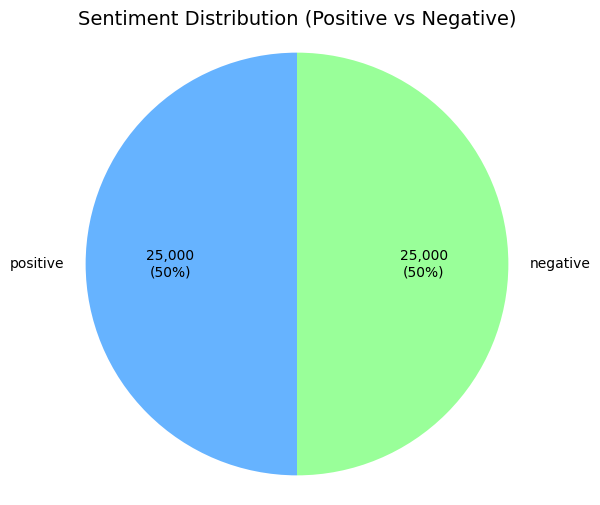

In [34]:

# Analytics into sentiment data
sentiment_counts = df_imdb_a['sentiment'].value_counts()

def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))
    return f"{absolute:,}\n({int(pct)}%)"

# Pie chart visualization
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct=lambda pct: func(pct, sentiment_counts), startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution (Positive vs Negative)', fontsize=14)
plt.axis('equal')




---
**PART 2 : Clean the data**


---

Removal of stopwords, HTML tags, punctuations, etc.   Created two new df's -  df_imdb_b and df_imdb_c.   df_imdb_b combines the original two columns + cleaned_review  (just in case I decide to use later for something).   df_imdb_c creates our new df for training purposes, consisting of only two columns - cleaned_review and sentiment.



In [31]:


def clean_text(text):

    # Remove HTML
    text = re.sub(r'<.*?>', '', text)

    # Lowercase
    text = text.lower()

    # Punctuation removal
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens into single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# New df copy of original columns + cleaned column  (review, cleaned_review, sentiment)
df_imdb_b['cleaned_review'] = df_imdb_a['review'].apply(clean_text)

# New df of only cleaned and sentiment columns for training
df_imdb_c = df_imdb_b[['cleaned_review', 'sentiment']]

# Confirm cleaning
print(df_imdb_c.head())


                                      cleaned_review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive




---
**PART 3 : Train/Test Split the data**


---

Splitting our data into train/test df's.   Using an 80/20 split.  



In [37]:
X = df_imdb_c['cleaned_review']
y = df_imdb_c['sentiment']

# Split data into train/test : 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display set size
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Create df's for train/test
train_df = pd.DataFrame({'cleaned_review': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'cleaned_review': X_test, 'sentiment': y_test})


Training set size: 40000
Test set size: 10000




---
**PART 4 : Transform the Text into Vectors**


---
Used TF-IDF vectorization on the cleaned review text to generate numerical weights.




In [40]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Fit test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display shape
print(f'Training data shape: {X_train_tfidf.shape}')
print(f'Test data shape: {X_test_tfidf.shape}')

Training data shape: (40000, 5000)
Test data shape: (10000, 5000)




---
**PART 5 : Put the data into an algorithm and create a model**


---
I have chosen to use a Logistic regression model, and trained on the processed data.



In [47]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train_tfidf, y_train)

# Predictions on test data
y_pred = model.predict(X_test_tfidf)




---

**PART 6 : Create a confusion matrix and classification report**

---
We evaluate the performance of our Logistic Regression model. The model analytics are displayed, along with the generation of a confusion matrix. Finally, a classification report.


Model Performance
---------------------
Accuracy: 0.8897
Precision: 0.8820
Recall: 0.8998
F1 Score: 0.8908


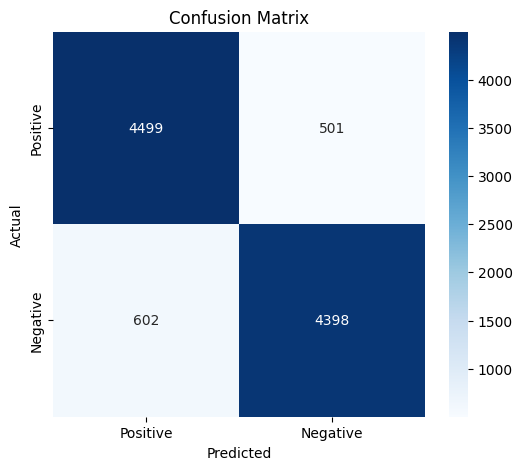

------------------------------------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.88      0.89      5000
    negative       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [58]:
# Model analytics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

# Display analytics
print(f'Model Performance')
print('---------------------')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

# Heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display report
print('-'*60)
print(classification_report(y_test, y_pred, target_names=['positive', 'negative']))



---
**PART 7 : Analyze and explain the confusion matrix and classification report**


---
Our model performs relatively well, with an accuracy score of 89%. This shows that it does a good job of accurately predicting the sentiment, in most cases.  The model's precision score indicates that our model is a little bit better at identifying positive reviews over negative ones. The F-1 score is 0.89 for both, which indicates a balanced performance.  One area of potential improvement could be fine tuning the precision for negative sentiments.

Thank you.
